# Abstract

This project implements a simple SIR (susceptible-infective-recovered) model to simulate the spread of infectious disease. The SIR model is a mathematical model used to study the spread of infectious diseases within a population. The model divides the population into three groups: Susceptible (S), Infected (I), and Recovered (R). The Susceptible individuals are those who can become infected, the Infected individuals are those who are currently infected and can spread the disease to others, and the Recovered individuals are those who have recovered from the disease and will not be infected again. The report aims to implement the SIR model using Euler method to calculate the change of S, I, R through time, that can provide insights into how infectious diseases spread and how we can mitigate them

# Introduction

SIR models the change in number of Susceptible, Infectious and Recovered individuals through time. At time t = 0, we start with an initialized values for S, I, R in the populuation N. And as time proceeds, we model how S, I, R will change. 

2 events that can change the state of the system:
* a susceptiable individual get infected due to contact with infected individual
* a previously infected individual recovers and gets immunization

The change in S, I, R in the population will be dependent on 2 constants: 
* the infection rate (alpha)
*  the recovery rate (beta)
* $R_o = \frac{\alpha}{\beta} $: expected number of infections from a single infection 

Below we have system of equation that quantifies S, I, R at timestep t

# Implementation of SIR Model

To implement SIR model, we can solve below 3 differential equations:

$$\frac{dS}{dt} = - \frac{\alpha SI}{N}$$

$$\frac{dI}{dt} = \frac{\alpha SI}{N} - \beta I$$

$$\frac{dR}{dt} = \beta I$$



Where:
* S: Initial Susceptible population
* I: Initial Infected popultion
* R: Initial Recovered popultation
* $\alpha$ : infection rate
* $\beta$: recovery rate
* $T_r$: time to recover $T_r = y^{-1}$
* N: a constant of S(t) + I(t) + R(t)


## Euler Formula based on SIR model

Given the SIR model at timestep $t_{n-1}$, we have the Euler formula as below to solve for S, I, R at timestep $t_{n}$

$$s_n = s_{n-1} - \alpha s_{n-1}i_{n-1}(t_{n} - t_{n-1}) $$
$$i_n = i_{n-1} + (\alpha s_{n-1}i_{n-1} - \beta i_{n-1})(t_{n} - t_{n-1}) $$
$$r_n = r_{n-1} + \beta i_{n-1}(t_{n} - t_{n-1}) $$

where

* s (float): fraction of susceptible individuals 
    
* i (float): fraction of infected individuals
    
* r (float): fraction of recovered immuned individuals

* s + i + r = 1


[Euler Method](https://www.maa.org/press/periodicals/loci/joma/the-sir-model-for-spread-of-disease-eulers-method-for-systems)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def solve_euler( t_max, dt, S0, I0, R0, alpha, beta ):
  """ solve for S, I, R from t_min to t_max
  Args:
    t_max(int): end timestep
    S0 (int): initial susceptible individuals
    I0 (int): initial infected individuals
    R0 (int): initial recovered immuned individuals
    alpha (float): infection rate
    beta (float): recovery rate

  Returns: 
    numpy array of [S, I, R] values for each timestep
  """
  # Initialize the arrays to store the values of the variables over time
  S = np.zeros(t_max+1)
  I = np.zeros(t_max+1)
  R = np.zeros(t_max+1)

  # Set the initial values of the arrays
  S[0] = S0
  I[0] = I0
  R[0] = R0

  # Implement the Euler method to update the variables over time
  for t in range(0, t_max, dt):
      S[t+1] = S[t] - alpha*S[t]*I[t]*dt
      I[t+1] = I[t] + (alpha*S[t]*I[t] - beta*I[t])*dt
      R[t+1] = R[t] + beta*I[t]*dt

  res = np.vstack((S, I, R))
  return res

def plot_sir(res):
  plt.plot(res[0], label='Susceptible')
  plt.plot(res[1], label='Infected')
  plt.plot(res[2], label='Recovered')
  plt.xlabel('Day')
  plt.ylabel('Number persons')
  plt.legend()
  plt.show()

## Verify

**Test 1**: Control run with provided parameter

Reproduction: 0.0004
****
S, I, R on the last day: 
S = 0.001758922333938201, I = 7030.065764388458, R = 37330.93247668922
***
Peak infections reached on day 34 at 35637.81337194359


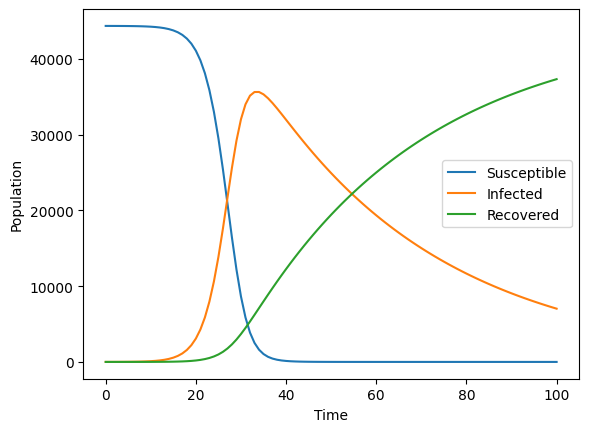

In [8]:
# Test 1
s0 = 44358
i0 = 3
alpha = 0.00001
beta = 0.025
res = solve_euler(t_max = 100, dt = 1, S0 = s0, I0 = i0, R0 = 0, alpha = alpha, beta = beta )

S, I, R = res[0], res[1], res[2]
Re = alpha/beta
print('Reproduction:', Re)
print("****")
print(f"S, I, R on the last day: \nS = {S[-1]}, I = {I[-1]}, R = {R[-1]}")
print("***")
print(f"Peak infections reached on day {np.argmax(I)} at {max(I)}" )
plot_sir(res)

Test 2: control run with simple parameters:
With very small recovery rate beta, the world is overrun by infected by Day 57

Reproduction: 1000.0000000000001
****
S, I, R on the last day: 
S = 8.03650212040337e-15, I = 44360.967058261886, R = 0.03294173812137112
***
Peak infections reached on day 57 at 44360.985419398916


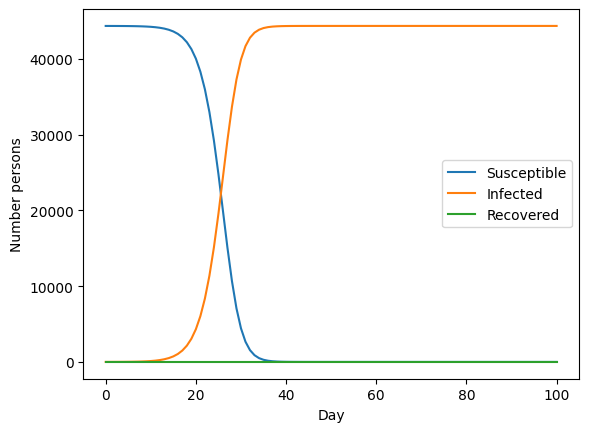

In [13]:
# Test 2
s0 = 44358
i0 = 3
alpha = 0.00001
beta = 0.00000001
res = solve_euler(t_max = 100, dt = 1, S0 = s0, I0 = i0, R0 = 0, alpha = alpha, beta = beta )

S, I, R = res[0], res[1], res[2]
Re = alpha/beta
print('Reproduction:', Re)
print("****")
print(f"S, I, R on the last day: \nS = {S[-1]}, I = {I[-1]}, R = {R[-1]}")
print("***")
print(f"Peak infections reached on day {np.argmax(I)} at {max(I)}" )
plot_sir(res)

# Model sensitivity based on varying infection rate and recovery rate

In [96]:
t_max = 100
dt = 1
S0 = 44358
I0 = 3
R0 = 0
num_experiments = 100

def experiment_sensitivity_alpha(mean_alpha):
    """ simulates the change of Infections based on normal distribution of Infection Rate alpha, 
    assuming we only change Infection Rate (alpha), and keep recovery rate (beta) at 0.025.
    """
    a_mean = mean_alpha
    a_std = mean_alpha * 0.2

    num_timesteps = int(t_max / dt) + 1

    results = {}
    res = solve_euler(t_max, dt, S0, I0, R0, alpha=mean_alpha, beta=0.025)
    results[mean_alpha] = res[1]
    
    for i in range(num_experiments):
        # Randomly sample the infection rate
        alpha = np.random.normal(a_mean, a_std)

        # Solve the system of differential equations
        res = solve_euler(t_max, dt, S0, I0, R0, alpha, beta=0.025)

        # Store the infected values
        I_values = res[1]

        # Store the results for this experiment
        results[alpha] = I_values
        
    # Calculate the mean and standard deviation of the infected values at each timestep

    return results


def experiment_sensitivity_beta(mean_beta):
    r_mean = mean_beta
    r_std = mean_beta / 6

    num_timesteps = int(t_max / dt) + 1

    results = {}
    res = solve_euler(t_max, dt, S0, I0, R0, alpha=0.00001, beta=mean_beta)
    results[mean_beta] = res[1]
    
    for i in range(num_experiments):
        # Randomly sample recovery rate
        beta = np.random.normal(r_mean, r_std)

        # Solve the system of differential equations
        res = solve_euler(t_max, dt, S0, I0, R0,  alpha=0.00001, beta=beta)

        # Store the infected values
        I_values = res[1]

        # Store the results for this experiment
        results[beta] = I_values
        
    # Calculate the mean and standard deviation of the infected values at each timestep

    return results


def plot_infections(infections, mean_value):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  for key, infection in infections.items():

    if key != mean_value:
       line_color = 'gray'
       ax.plot(infection, color=line_color, linewidth=1, alpha=0.2)
    elif key == mean_value:
       print(key)
       line_color = 'red'
       ax.plot(infection, color=line_color, linewidth=3)
    
  
  # Labeling the chart
  plt.title('Infections by Experiments')
  plt.xlabel('Time')
  plt.ylabel('Infections')
  
  # Displaying the chart
  plt.show()


## Model sensitivity based on infection rate

1e-05


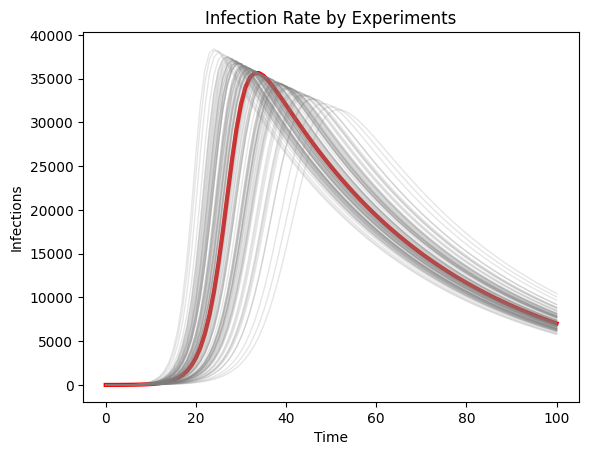

In [89]:
mean_alpha = 0.00001
alpha_infections = experiment_sensitivity_alpha(mean_alpha=mean_alpha)
# infections[mean_alpha)
plot_infections(alpha_infections, mean_alpha) 

## Model sensitivity based on Recovery Rate

0.025


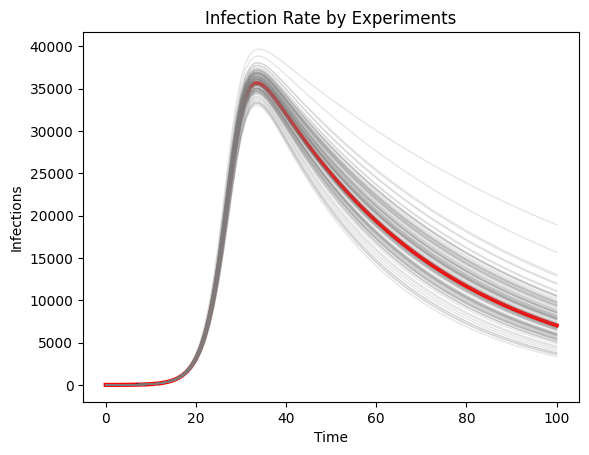

In [90]:
mean_beta = 0.025
beta_infections = experiment_sensitivity_beta(mean_beta=mean_beta)
# infections[mean_alpha)
plot_infections(beta_infections, mean_beta)

In [92]:
peak_infections = []
for infection in alpha_infections.values():
    peak = max(infection)
    peak_infections.append(peak)

for infection in beta_infections.values():
    peak = max(infection)
    peak_infections.append(peak)

print(len(peak_infections))

202


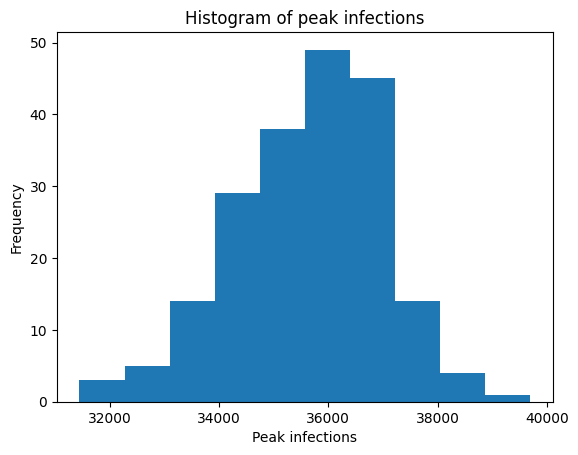

In [95]:
plt.hist(peak_infections)
plt.title("Histogram of peak infections")
plt.xlabel("Peak infections")
plt.ylabel("Frequency")
plt.show()

# Summary
The SIR model is a mathematical model used in epidemiology to study and predict the spread of infectious diseases. In this evaluation, the Euler method was employed to simulate the spread of a disease in a population using the SIR model. The Euler method can estimate the number of susceptible, infected, and recovered individuals iteratively at each time step using the initial values of the parameters, such as infection rate, recovery rate, and the number of infected people at the start. Variations in these initial parameters allow simulation and prediction of the spread and severity of the disease.

In order to investigate the effect of varying the infection rate on the model's sensitivity, 100 simulations were performed by selecting a value of a from a normal distribution of infection rate, where the model's control value was used as a mean and a standard deviation of 20% of the mean value of a was used as variation. Similarly, the recovery rate r was also chosen from a normal distribution with the control value as mean and a standard deviation of 1/6th mean value. Our analysis revealed a normal distribution of peak infections occurring around 36000. This finding can help planners to prepare appropriate health care measures.